# Exercise 1: Employment

In this task we are given a set of features of 5412 workers who were surveyed in the April 2008 Current Population Survey and reported that they were employed. 
The data file contains their employment status in April 2009, one year later, along with some additional variables.

Our task is to predict whether the employee will still be employed in 2009 based on the information from 2008.

## Imports

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load data 

In [107]:
train_data = pd.read_csv("employment_train.csv")
test_features = pd.read_csv("employment_test.csv")

## 1. Exploring data

In [108]:
# Taking a first look
train_data.head()

,Unnamed: 0,age,race,earnwke,employed,unemployed,married,union,ne_states,so_states,...,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
0,0,53,1,NaN,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,39,1,NaN,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
2,2,41,1,500,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,3,27,1,520,1,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
4,4,29,3,615,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [109]:
train_data.describe()

,Unnamed: 0,age,race,employed,unemployed,married,union,ne_states,so_states,ce_states,...,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
count,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,...,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000
mean,2701.044321,42.123177,1.226401,0.889870,0.040292,0.647928,0.126055,0.209325,0.293170,0.249808,...,0.177283,0.706639,0.116078,0.068496,0.274751,0.197429,0.110514,0.221796,0.127015,0.485994
std,1566.134437,11.358779,0.563532,0.313082,0.196661,0.477662,0.331943,0.406866,0.455259,0.432943,...,0.381945,0.455346,0.320350,0.252619,0.446431,0.398097,0.313560,0.415494,0.333021,0.499852
min,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1340.750000,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2694.500000,43.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4059.250000,51.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5411.000000,63.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
num_rows, num_columns = train_data.shape
print("Number of rows: ", num_rows)
print("Number of columns: ", num_columns)

Number of rows:  5212
Number of columns:  22


In [111]:
print("Data types of each column:")
print(train_data.dtypes)

Data types of each column:
Unnamed: 0       int64
age              int64
race             int64
earnwke         object
employed         int64
unemployed       int64
married          int64
union            int64
ne_states        int64
so_states        int64
ce_states        int64
we_states        int64
government       int64
private          int64
self             int64
educ_lths        int64
educ_hs          int64
educ_somecol     int64
educ_aa          int64
educ_bac         int64
educ_adv         int64
female           int64
dtype: object


As the "earnwke" column is in string type and not float we have to transform it. Before we can do this, we also have to change the commas to dots, as this is used in the standard float notation. 

In [112]:
#Replacing Commas with Dots in order to convert them to float afterwards
train_data["earnwke"] = train_data["earnwke"].str.replace(',', '.', regex=False)
#Converting the "earnwke" column from string to integer 
train_data["earnwke"] = train_data["earnwke"].astype(float)

#Replacing Commas with Dots in order to convert them to float afterwards
test_features["earnwke"] = test_features["earnwke"].str.replace(',', '.', regex=False)
#Converting the "earnwke" column from string to integer 
test_features["earnwke"] = test_features["earnwke"].astype(float)

Our target is "employed". Let us have a look which values are how often present. 
Reminder: The value 1 indicates that the surveyed individual was still employed one year after the survey while 0 means that he is not employed anymore.

In [113]:
employed = train_data[["employed"]].value_counts()
employed

employed
1           4638
0            574
dtype: int64

In the next step let's have a look at the correlation of the columns in our data: 

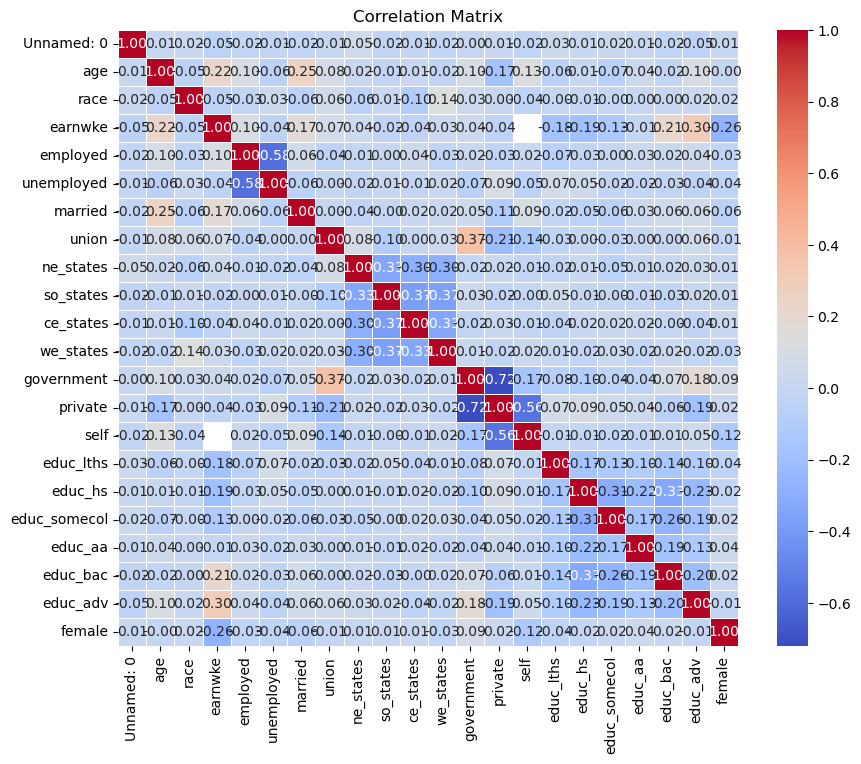

In [114]:
correlation_matrix = train_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix  we can see a high negative correlation between "government" and "private" which is not surprising, as individuals often work either for the government or a privat firm. This also explains the negative correlation between "private" and "self". 

Another interesting observation is the score of the negative correlation for "employed" and "unemployed". As these two options of the survey should be opposite of each other we should have a score of -1. A score less than this indicates, that there are instances where both options got the same entry which makes no sense. As we can't learn from these samples, we simply delete them. 

In [115]:
train_data = train_data[train_data["employed"] != train_data["unemployed"]]

In [116]:
train_data

,Unnamed: 0,age,race,earnwke,employed,unemployed,married,union,ne_states,so_states,...,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
0,0,53,1,NaN,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,39,1,NaN,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
2,2,41,1,500.00,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,3,27,1,520.00,1,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
4,4,29,3,615.00,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5207,5407,24,1,300.00,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
5208,5408,50,2,562.50,1,0,0,1,1,0,...,1,0,0,0,1,0,0,0,0,1
5209,5409,44,1,1038.46,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
5210,5410,49,2,640.00,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1


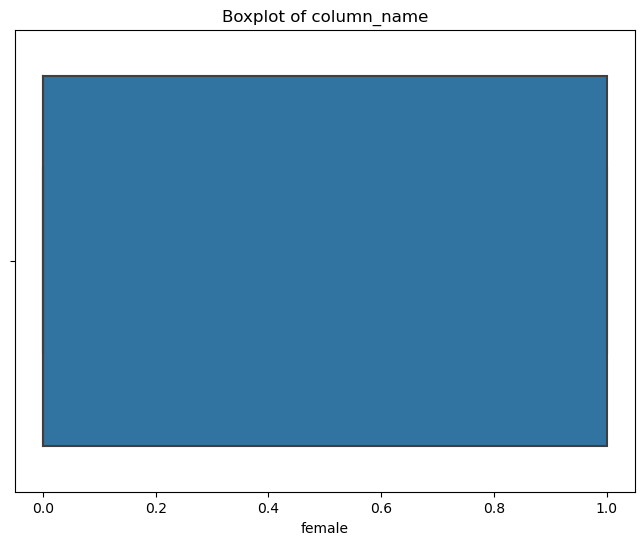

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting boxplot for a specific column
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_data['female'])
plt.title('Boxplot of column_name')
plt.show()

In [118]:
print("Column names:")
print(pd.Series(train_data.columns))

Column names:
0       Unnamed: 0
1              age
2             race
3          earnwke
4         employed
5       unemployed
6          married
7            union
8        ne_states
9        so_states
10       ce_states
11       we_states
12      government
13         private
14            self
15       educ_lths
16         educ_hs
17    educ_somecol
18         educ_aa
19        educ_bac
20        educ_adv
21          female
dtype: object


Looking at the column names, we can see that out of the 22 columns, 19 are actual features and the remaining three are: Index ("Unnamed: 0"), and the targets ("employed" resp. "unemployed"). Other than the 19 feature columns we only need one target column, as the values of the "unemployed" are the opposite of the ones of the "employed" column. We therefore drop the unnecessary columns. 

In [119]:
train_data = train_data.drop(columns = ["Unnamed: 0", "unemployed"])

As we could already observe from a first look into the data, we have some NaN values. Let's see where they are and how many we have: 

In [120]:
nan_values = train_data.isna()
columns_with_nans = nan_values.any()

print("Columns with NaN values: ") 
print(columns_with_nans)

nan_count_per_column = nan_values.sum()
print("\nNumber of NaN values per column: ")
print(nan_count_per_column)

Columns with NaN values: 
age             False
race            False
earnwke          True
employed        False
married         False
union           False
ne_states       False
so_states       False
ce_states       False
we_states       False
government      False
private         False
self            False
educ_lths       False
educ_hs         False
educ_somecol    False
educ_aa         False
educ_bac        False
educ_adv        False
female          False
dtype: bool

Number of NaN values per column: 
age               0
race              0
earnwke         556
employed          0
married           0
union             0
ne_states         0
so_states         0
ce_states         0
we_states         0
government        0
private           0
self              0
educ_lths         0
educ_hs           0
educ_somecol      0
educ_aa           0
educ_bac          0
educ_adv          0
female            0
dtype: int64


To handle these missing values, we fill them up with the mean values:

In [121]:
train_data = train_data.fillna(train_data.mean())
train_data

,age,race,earnwke,employed,married,union,ne_states,so_states,ce_states,we_states,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
0,53,1,865.768865,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,39,1,865.768865,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
2,41,1,500.000000,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,27,1,520.000000,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
4,29,3,615.000000,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5207,24,1,300.000000,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
5208,50,2,562.500000,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1
5209,44,1,1038.460000,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
5210,49,2,640.000000,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


Now we look for NaN values in our test set: 

In [122]:
nan_values = test_features.isna()
columns_with_nan = nan_values.any()

nan_count_per_column = nan_values.sum()
nan_count_per_column

Unnamed: 0       0
age              0
race             0
earnwke         34
married          0
union            0
ne_states        0
so_states        0
ce_states        0
we_states        0
government       0
private          0
self             0
educ_lths        0
educ_hs          0
educ_somecol     0
educ_aa          0
educ_bac         0
educ_adv         0
female           0
dtype: int64

In [123]:
test_features = test_features.fillna(test_features.mean())
test_features

,Unnamed: 0,age,race,earnwke,married,union,ne_states,so_states,ce_states,we_states,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
0,43,59,1,2884.610000,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,45,57,3,1360.000000,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
2,64,45,1,446.800000,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
3,86,61,1,2884.610000,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
4,94,23,1,512.000000,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5144,56,1,414.000000,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
196,5190,62,1,440.000000,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
197,5296,62,3,250.000000,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
198,5313,56,1,291.900000,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1


In [124]:
nan_values = test_features.isna()
columns_with_nan = nan_values.any()

nan_count_per_column = nan_values.sum()
nan_count_per_column

Unnamed: 0      0
age             0
race            0
earnwke         0
married         0
union           0
ne_states       0
so_states       0
ce_states       0
we_states       0
government      0
private         0
self            0
educ_lths       0
educ_hs         0
educ_somecol    0
educ_aa         0
educ_bac        0
educ_adv        0
female          0
dtype: int64

As we can see, we have successfully handled all missing values! We can now go on to train our models.

In [125]:
from sklearn.utils import resample


train_data_majority = train_data[(train_data['employed']==1)] 
train_data_minority = train_data[(train_data['employed']==0)] 

train_data_minority_upsampled = resample(train_data_minority, 
                                 replace=True,    
                                 n_samples= 4638, 
                                 random_state=0)  

train_data_res = pd.concat([train_data_minority_upsampled, train_data_majority])


### Handling class imbalance

We have an highly imbalanced dataset, as we can see in the following plot: 

{0: 210, 1: 4638}


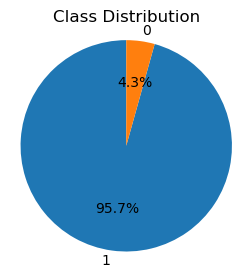

In [126]:
y_train = train_data["employed"]
class_counts = y_train.value_counts()

print(dict(zip(*np.unique(y_train, return_counts=True))))

# Create a pie plot
plt.figure(figsize=(3, 3))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Let's handle this by applying SMOTE oversampling of the minority class: 

Before SMOTE:  {0: 210, 1: 4638}
After SMOTE:  {0: 4638, 1: 4638}


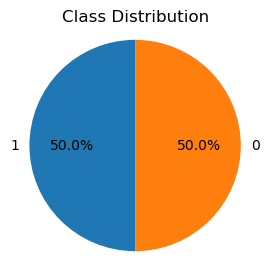

In [128]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


X_train = train_data.drop("employed", axis=1)
y_train = train_data["employed"]# Summarize class distribution

print("Before SMOTE: ", dict(zip(*np.unique(y_train, return_counts=True))))

# Define SMOTE model
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Summarize new class distribution
print("After SMOTE: ", dict(zip(*np.unique(y_res, return_counts=True))))
class_counts = y_res.value_counts()

# Create a pie plot
plt.figure(figsize=(3, 3))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Let's try another resampling method: 

In [131]:
from sklearn.utils import resample

train_data_majority = train_data[(train_data['employed']==1)] 
train_data_minority = train_data[(train_data['employed']==0)] 

train_data_minority_upsampled = resample(train_data_minority, 
                                 replace=True,    
                                 n_samples= 4638, 
                                 random_state=0)  

train_data_res = pd.concat([train_data_minority_upsampled, train_data_majority])

In [132]:
X_train, X_test, y_train, y_test = train_test_split(train_data_res.drop("employed", axis=1), train_data_res["employed"], test_size=0.3, random_state=42)

## Training a classifier

In [133]:
test_features

,Unnamed: 0,age,race,earnwke,married,union,ne_states,so_states,ce_states,we_states,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
0,43,59,1,2884.610000,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,45,57,3,1360.000000,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
2,64,45,1,446.800000,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
3,86,61,1,2884.610000,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
4,94,23,1,512.000000,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5144,56,1,414.000000,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
196,5190,62,1,440.000000,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
197,5296,62,3,250.000000,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
198,5313,56,1,291.900000,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1


In [134]:
X_train = train_data_res.drop("employed", axis=1)
y_train = train_data_res["employed"]
X_test = test_features.drop(columns="Unnamed: 0")

In [135]:
y_train.value_counts()

0    4638
1    4638
Name: employed, dtype: int64

### Decision Tree

In [136]:
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_res,y_res)
y_pred = clf.predict(X_test)

In [137]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1])

### Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model
rf.fit(X_res, y_res)
# Predict the labels of the test set
y_pred = rf.predict(X_test)

# Calculate the accuracy
#accuracy = accuracy_score(y_test, y_pred)
#print(f"Accuracy: {accuracy * 100:.2f}%")

In [139]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1])

In [140]:
"""
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'y_test' and 'y_pred' are available from the testing phase of your model

# Classification report (Precision, Recall, F1-score)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# ROC-AUC
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

print("ROC AUC score:", roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
"""

ValueError: Found input variables with inconsistent numbers of samples: [2783, 200]

### Multilayer Perceptron

In [156]:
from sklearn.utils import resample

train_data_majority = train_data[(train_data['employed']==1)] 
train_data_minority = train_data[(train_data['employed']==0)] 

train_data_minority_upsampled = resample(train_data_minority, 
                                 replace=True,    
                                 n_samples= 6972, 
                                 random_state=0)  

train_data_res = pd.concat([train_data_minority_upsampled, train_data_majority])

In [158]:
train_data_res

,age,race,earnwke,employed,married,union,ne_states,so_states,ce_states,we_states,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
4150,29,1,903.840000,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
1056,53,2,865.768865,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2892,22,1,330.000000,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
4605,46,1,660.000000,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0
1470,34,2,315.000000,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5207,24,1,300.000000,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
5208,50,2,562.500000,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1
5209,44,1,1038.460000,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
5210,49,2,640.000000,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


In [164]:
X_train = train_data_res.drop("employed", axis=1)
y_train = train_data_res["employed"]
X_test = test_features.drop(columns="Unnamed: 0")

In [165]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Example of using an advanced optimizer and modifying the hidden layers
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, alpha=1e-4,
                    solver='adam', verbose=10, random_state=0,
                    learning_rate_init=0.01, learning_rate='adaptive')

mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
#accuracy = accuracy_score(y_test, y_pred)

#print(f"Accuracy: {accuracy * 100:.2f}%")

Iteration 1, loss = 5.51447417
Iteration 2, loss = 0.96244489
Iteration 3, loss = 1.46823900
Iteration 4, loss = 0.75342293
Iteration 5, loss = 0.78704724
Iteration 6, loss = 0.79392774
Iteration 7, loss = 0.63849416
Iteration 8, loss = 0.68974009
Iteration 9, loss = 0.64470893
Iteration 10, loss = 0.64535035
Iteration 11, loss = 1.01091105
Iteration 12, loss = 0.63642002
Iteration 13, loss = 0.65755584
Iteration 14, loss = 0.60715730
Iteration 15, loss = 0.62024544
Iteration 16, loss = 0.61532190
Iteration 17, loss = 0.63073116
Iteration 18, loss = 0.63157559
Iteration 19, loss = 0.61504634
Iteration 20, loss = 0.59989246
Iteration 21, loss = 0.60607218
Iteration 22, loss = 0.62987983
Iteration 23, loss = 0.63844655
Iteration 24, loss = 0.61859621
Iteration 25, loss = 0.60637173
Iteration 26, loss = 0.60868275
Iteration 27, loss = 0.59821132
Iteration 28, loss = 0.59689994
Iteration 29, loss = 0.60225254
Iteration 30, loss = 0.62166638
Iteration 31, loss = 0.62083143
Iteration 32, los

In [166]:
len(y_pred)

200

Finally, we save our predictions into a submission file: 

In [167]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0])

In [168]:
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([129,  71]))

In [169]:
# Getting the indexes of the test file
ids = test_features["Unnamed: 0"]

# Saving predictions in requested format
predictions = pd.DataFrame(list(zip(ids, y_pred)), columns=['Id', 'Category'])

predictions

,Id,Category
0,43,0
1,45,0
2,64,0
3,86,0
4,94,0
...,...,...
195,5144,0
196,5190,0
197,5296,1
198,5313,1


In [170]:
# Save the DataFrame to a CSV file
predictions.to_csv('employment_predictions.csv', index = False)

In [171]:
testing = pd.read_csv("employment_predictions.csv")
testing

,Id,Category
0,43,0
1,45,0
2,64,0
3,86,0
4,94,0
...,...,...
195,5144,0
196,5190,0
197,5296,1
198,5313,1


In [173]:
testing["Category"].value_counts()

0    129
1     71
Name: Category, dtype: int64